<a href="https://colab.research.google.com/github/chloe-dg/machine_learning_assignments/blob/main/assignment_1_Random_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Projection Analysis
Group 6, April 3, 2022

Group Members:

1. Chaitanya Madduri
2. Eduwardo Garcia
3. Thi Anh Ba Dang
4. Vishnu Prabhakar
5. Tumeng Zhang

> <i> In the notebook we have applied the Random Projection Analysis on 2 different Datasets</i>


Content:
1. Loading the Packages 
2. Dataset 1 - KMNIST Dataset
3. Building the Neural Network Model with KMNIST data
4. Second Dataset : Fashion MNIST
5. Building the Neural Network Model with Fashion MNIST data
6. Observations and Summary 

Dependencies:

For the KMNIST please use the .npz files placed in the folder. Alternatively please refer to https://github.com/rois-codh/kmnist

## 1. Loading the Packages 

In [ ]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # works
#warnings.filterwarnings(action='once') #does not work

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Dataset 1 - KMNIST Dataset
- Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.

### 2.1. Loading the KMNIST Datasets 

In [ ]:
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train = np.load('kmnist-train-labels.npz')['arr_0']
X_test = np.load('kmnist-test-imgs.npz')['arr_0']
y_test = np.load('kmnist-test-labels.npz')['arr_0']

In [ ]:
# the data, shuffled and split between train and test sets

# (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print("X_train original shape of images", X_train.shape)
print("y_train original shape of label vector", y_train.shape)

X_train original shape of images (60000, 28, 28)
y_train original shape of label vector (60000,)


### 2.2 Ploting the classes 

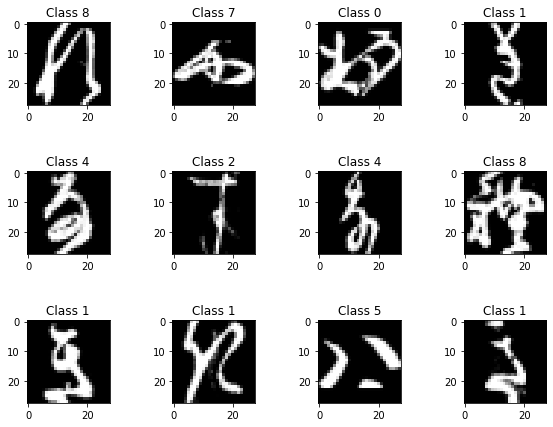

In [ ]:
# inspect your data
from matplotlib.pyplot import figure
plt.figure(figsize= (10,7))
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.subplots_adjust(hspace=0.8)
    plt.imshow(X_train[ii], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[ii]))

In [ ]:
# Flattening the 3D images to the 2D
X_train = X_train.flatten().reshape(60000, 784)
X_test = X_test.flatten().reshape(10000, 784)

In [ ]:
X_train.shape[0] + X_test.shape[0]

70000

####  Print what the theory says for k, given an eps(ilon)

In this case we have 784 features  and we are selceting an epsilon of 0.15

In [ ]:
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(784,eps=0.15))

Professors Johnson and Lindenstrauss say: k >= 2632


## 3. Building the Neural Network Model with KMNIST data

Used Neural network Algorithm with 1 Hidden layer and used relu activation Funtion.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[784]),
    tf.keras.layers.Dense(120, activation='relu'),

    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, verbose=0)

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)



Test accuracy: 0.8586000204086304


##### Taking 20 different values of dimentions and creating the random Projection.

In [ ]:
# baseline = metrics.accuracy_score(model.predict(X_test), y_test)
accuracies = []
dims = np.int32(np.linspace(2, 784, 20))

In [ ]:
dims

array([  2,  43,  84, 125, 166, 207, 248, 290, 331, 372, 413, 454, 495,
       537, 578, 619, 660, 701, 742, 784], dtype=int32)

### Applying the Sparse Random Projection 

In [ ]:
# dims = [10]
# Loop over the projection sizes, k
accuracies = []
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(X_train)
 
    # Train classifier of your choice on the sparse random projection
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=[dim]),
    tf.keras.layers.Dense(800, activation='relu'),
    tf.keras.layers.Dense(10)
])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model.fit(X, y_train, epochs=10, verbose=0)

    X_test_1 = sp.transform(X_test)
    test_loss, test_acc = model.evaluate(X_test_1,  y_test, verbose=0)
    # model.fit(X, trainTarget)
 
    # Evaluate model and update accuracies
    # test = sp.transform(testData)
    accuracies.append(test_acc)

In [ ]:
X_test.shape

(10000, 784)

#### Accuracy vs Dimension Count for KMNIST

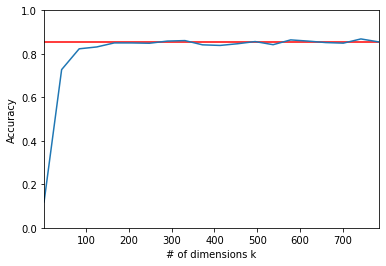

In [ ]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 784])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [test_acc] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()

In [ ]:
new_df = pd.DataFrame(columns=['Dims','accuracy'])
new_df['Dims'] = dims
new_df['accuracy'] = accuracies


In [ ]:
new_df.sort_values('accuracy')

,Dims,accuracy
0,2,0.1190
1,43,0.7275
2,84,0.8232
3,125,0.8317
10,413,0.8387
9,372,0.8415
13,537,0.8421
11,454,0.8465
6,248,0.8487
17,701,0.8492


### KMNIST Accuracy Analysis: 
Initially, we designed the Neural network with all the features and have seen an accuracy of ~85%. So, we have tried Sparse Random projection where we increased the dimensions length from lower to the max of 784 and we can see from the above graph and table that approximately for the feature count around 300 we stimulate the same accuracy 


# 4. Second Dataset : Fashion MNIST

We have taken the Fashion MNIST datset and performed similar analysis.
- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

### 4.1 loading the Dataset 

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Creating list to capture all the class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Flattening the 3D images to the 2D
train_images = train_images.flatten().reshape(60000, 784)
test_images = test_images.flatten().reshape(10000, 784)

## 5. Building the Neural Network Model with Fashion MNIST data

In [ ]:
# Printing the Test Accuracy for the Baseline model
test_acc

0.8460000157356262

In [ ]:
dims = np.concatenate((np.int32(np.linspace(2, 100, 15)), np.int32(np.linspace(100, 784, 10))))

# Loop over the projection sizes, k
accuracies_1 = []
for dim in dims:
    # Create random projection
    sp = SparseRandomProjection(n_components = dim)
    X = sp.fit_transform(train_images)
 
    # Train classifier of your choice on the sparse random projection
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[dim]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model.fit(X, train_labels, epochs=10, verbose=0)

    X_test = sp.transform(test_images)
    test_loss, test_acc = model.evaluate(X_test,  test_labels, verbose=0)
 
    # Evaluate model and update accuracies
    accuracies_1.append(test_acc)

In [ ]:
# Printing the accuracies 
accuracies_1 

[0.10000000149011612,
 0.6193000078201294,
 0.7305999994277954,
 0.7824000120162964,
 0.795199990272522,
 0.8087999820709229,
 0.8116000294685364,
 0.8246999979019165,
 0.8125,
 0.8312000036239624,
 0.829800009727478,
 0.8348000049591064,
 0.830299973487854,
 0.8485999703407288,
 0.8418999910354614,
 0.8323000073432922,
 0.8489999771118164,
 0.8375999927520752,
 0.859000027179718,
 0.854200005531311,
 0.8536999821662903,
 0.8637999892234802,
 0.8603000044822693,
 0.8492000102996826,
 0.8460000157356262]

#### Accuracy vs Dimension Count for Fashion MNIST

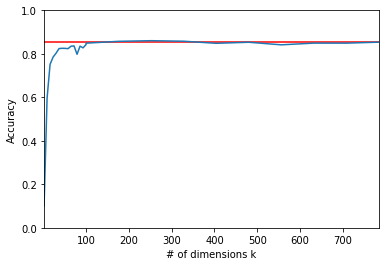

In [ ]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 784])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies_1
plt.plot(dims, [test_acc] * len(accuracies_1), color = "r")
plt.plot(dims, accuracies_1)

plt.show()

In [ ]:
new_df_2 = pd.DataFrame(columns=['Dims','accuracy'])
new_df_2['Dims'] = dims
new_df_2['accuracy'] = accuracies_1


In [ ]:
new_df_2.sort_values('accuracy')

,Dims,accuracy
0,2,0.1000
1,9,0.6193
2,16,0.7306
3,23,0.7824
4,30,0.7952
5,37,0.8088
6,44,0.8116
8,58,0.8125
7,51,0.8247
10,72,0.8298


### Accuracy Analysis:
As KMNIST dataset analysis, we can see the similar pattern with the Fashion MNIST. Although the datasets are coompletely different like the content in the images the dimensions are maintained the same. AS observed above graph it can be inferred that with Random Projections at a dimention of close to 200 we are able to get the similar accuracy as the baseline model (model where we use all the festures.) 

## 6. Observations and Summary 

--- Question 3

*Based on the program developed in the lecture (SparseRandomProjec-
tions), analyze 2 databases of your choice (but not exactly the same digits
data as in the lecture) using random projections.

Study the accuracy (or a score of your choice that makes most sense for
your data) as a function of the number of dimensions / features that
survived the random projection.

Try to avoid a zick-zack curve below or around the baseline accuracy curve
as your final result for both datasets. At least for one dataset the score
is expected to be a smooth-ish curve as a function of the kept number of
features. Provide a take-home statement and explain every step.

You will find that data that is embedded in Eukledian spaces (such as
digits) may be more appropriate than data for which Eukledian distances
are not an excellent distance measure.*

--- End of the Question 

1. *Step by step explanation:*
    - *Load the datasets: fashionMNIST and KMNIST, shape=MxN (M = number of samples, N = number of dimensions / features)*
    - *Create train and test datasets using train_test_split*
    - *Create “dims” - list of smaller dimensions (Di) to test the accuracy (Di < M)*
    - *Create X,Y from by fit_transform “SparseRandomProjection” to train and test datasets, result is dataframe NxDi*
        - *How SparseRandomProjection algorithm works?*
            1. *Take dataset K: dimension MxN (M=samples, N=original dimension/features).*
            2. *Initialize a random 2D matrix R of size NxD where D=new reduced dimension.*
            3. *Normalize the columns of R making them unit length vectors.*
            4. *Matrix multiplication J=KxR. J is the final output with dimension MxD.*
    - *Initialize the setup for the classification model*
    - *Fit the model on Xi, Yi*
    - *Create a list of model accuracies for each of the dimensions Di in “dims”*
2. *Take-home message:*
    - *Random Projections should be used when we have a **huge number of features** (eg. >40) and hence need a speed boost up. PCA will still be the better option in lower dimension datasets.*
    - *Random Projection works best when we reduce a high dimension space to ‘medium’ dimensional space. Accuracy will be very bad when D chosen is very small (eg. < 30) when N is very high (eg. 1000). However the closer D gets to N, accuracies does not increase much.*
    - ***Robust to outliers.*** Random Project is better than PCA as it is robust to outliers, which lead to higher accuracy and explanation power. This is very important in high-dimension datasets.
    - ***Very Fast.** Time complexity = 𝑂(𝑛𝑘𝑑) where k,d are original dimension & reduce dimension respectively with k>d. However, PCA on a matrix of size n×k, takes 𝑂(𝑘²×𝑛+𝑘³) time. If k is huge, PCA becomes very slow and inefficient.*